# Ejercicio de regresion lineal 

## Bryan Hurtado

En este Notebook vamos a describir paso a paso un ejercicio de prediccion, a traves de la regresion lineal, de la cantidad de ocasiones en que sera compartido un articulo de el area de ML presentado en un Blog

### Prediccion: Cantidad de ocaciones que se comparte un articulo

Iniciamos importando librerias, ajustando y visualizando datos.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#se carga el archivo de datos de entrada csv como dataset de pandas. 
#los proviene de http://www.knugeets.com
data = pd.read_csv("./articulos de blog ml.csv")

Pandas en un libreria de python destinada a analisis de datos, que proporciona estructuras de datos flexibles las cuales permiten trabajar con ellos de forma eficiente. pandas ofrece las siguientes estructura de datos: son arrays con indexacion (arrays con indice o etiquetados), similar a los direccionarios, puede generarse a partir de diccionarios de la listas. Dataframe: Son estructuras de datos similares a las tablas de datos relaciones con SQL. Panel, Panel4D y panelND: son estructuras de datos permite trabajar con mas de datos de dos dimensiones.

In [3]:
# Revisamos la dimension (Registros x columnas) que contiene 
data.shape

(161, 8)

In [4]:
# se puede revisar los primeros registros para darnos una idea de los datos
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


vemos que algunos tributos o columnas tienen valores ulos o tambien (NAN) por ejemplo el atributo URL 

En este caso el atributo Shares sera la salida, es decir, el valor Y de modelo de regresion lineal. por lo cual sera el valor que deseamos predecir

In [5]:
# Se realiza una estadistica descriptiva para tener conocimiento inicial de los datos mediante
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


se observa que la media del atributo word count es 1808.26
que el articulo mas pequeño contiene 250 palabras y el mas grande 8401 palabras y respecto a cuantas veces se a compartido un articulo existe los que se han compartido 0 veces a los mas recurrentes 350000 (muy popular)

### Visualizacion General

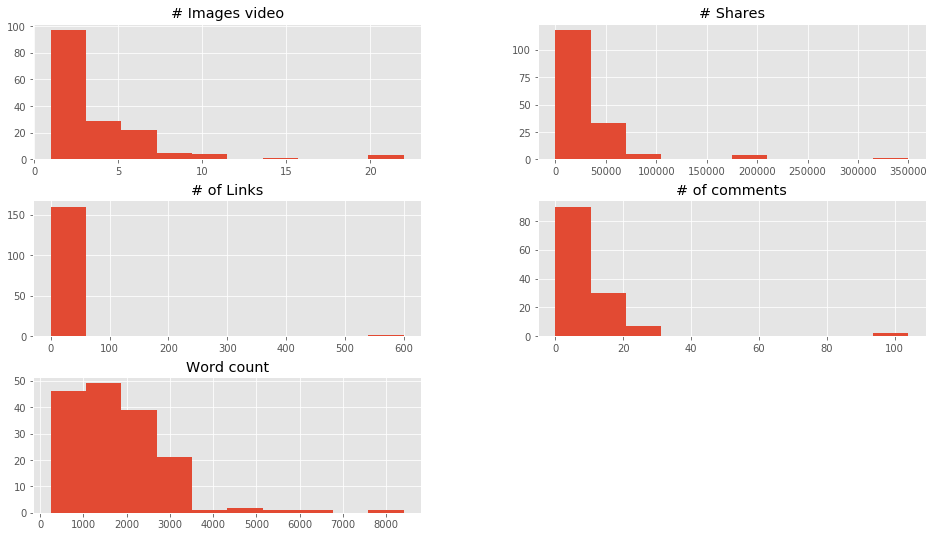

In [6]:
# se visualizan los atributos de entrada mediante histogramas y barras (cuantitativas y cualitativas)
data.drop(['Title','url','Elapsed days'],1).hist()
plt.show()

las graficas anteriores comunican entre que valores se concentran la mayoria de los registros seguidamente se registran los datos por cantidad de palabras dejando los registros menos de 3500 palabras y tambien por cantidad de compartidos con menos a 80.

### Visualizar cantidad de palabras v. compartidos

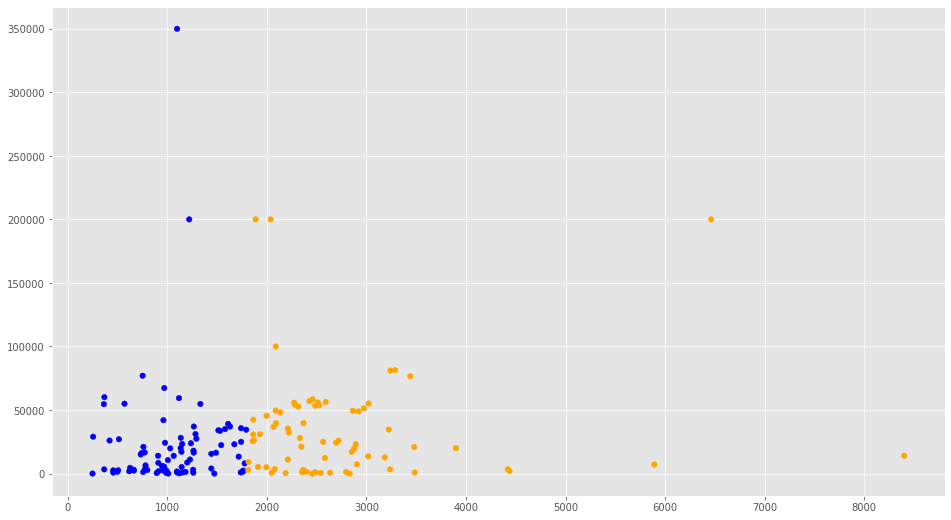

In [7]:
#Visualizar datos de entrada
colores = ['orange','blue']
tamanios=[30,60]

f1 = data['Word count'].values
f2 = data['# Shares'].values

#Pintar en 2 colores los puntos por debajo de la media de cantidad de palabras
asignar =[]
for index,row in data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
        
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

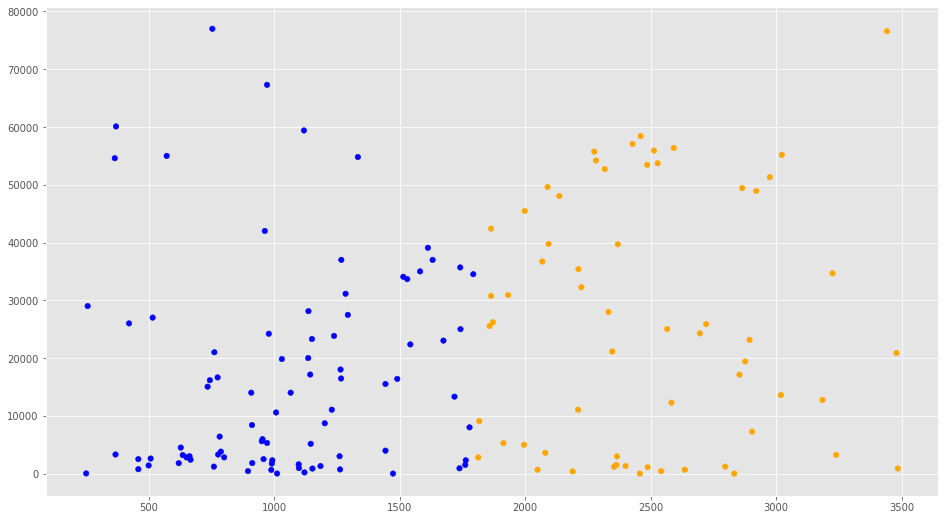

In [8]:
# VISUALIZAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 3.500
# y en el eje Y: entre 0 y 80.000
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values

# Pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [9]:
#revisar cambios de valores
filtered_data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,148.000000,148.000000,121.000000,148.000000,148.000000,148.000000
mean,1640.209459,5.743243,7.256198,3.331081,91.554054,20545.648649
std,821.975365,6.064418,6.346297,2.706476,91.143923,19933.865031
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,971.000000,3.000000,2.000000,1.000000,28.750000,2750.000000
50%,1536.000000,5.000000,6.000000,3.000000,60.000000,15836.000000
75%,2335.750000,7.000000,11.000000,4.000000,110.500000,34177.500000
max,3485.000000,49.000000,30.000000,22.000000,349.000000,77000.000000


### Regresion lineal simple (1 atributo python y SKLearn) 

In [10]:
#Asignamos el atributo de entrada x para entrenamiento y la etiqueta y.
dataX = filtered_data[['Word count']]
x_train = np.array(dataX)
y_train = filtered_data['# Shares'].values

In [11]:
# se genera el objeto de regresion lineal
regr = linear_model.LinearRegression()

#se entrena modelo
regr.fit(x_train, y_train)

#se realizan las predicciones
y_pred = regr.predict(x_train)

#se revisan los coeficientes obtenidos. En este caso tangente
print('Coeficientes: \n', regr.coef_)
#este valor de donde corta y (x=0)
print('termino independiente: \n',regr.intercept_)
#error cuadro medio
print('media del error cuadrado %.2f' % mean_squared_error(y_train, y_pred))
#puntaje de varianza. el mejor puntaje es un 1.0
print('puntaje de varianza: %2.f' % r2_score(y_train, y_pred))

Coeficientes: 
 [5.69765366]
termino independiente: 
 11200.303223074157
media del error cuadrado 372888728.34
puntaje de varianza:  0


de la ecuacion de la recta y = mx+ b la pendiente m es el coeficiente 5.96 y el termino intependiente b es 11200.30. existe un error cuadratico grande; por lo cual este modelo no es el mas adecuado. pero estamos aprendiendo su funcionamiento, lo que resulta importante po el momento, esto lo vemos reflejado en el puntaje de varianza la cual debe ser cerca a 1.0 

###  Visualizacion de recta obtenida

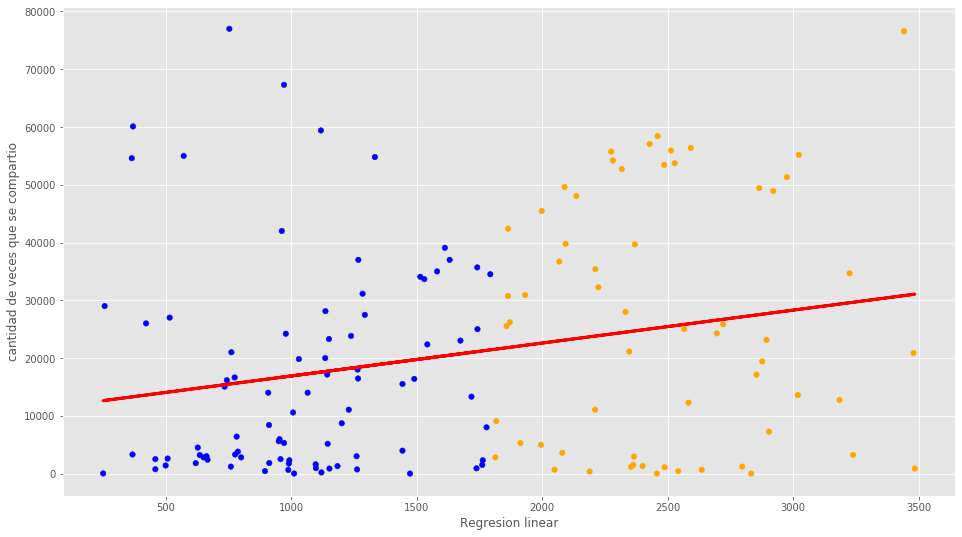

In [12]:
plt.scatter(x_train[:,0], y_train, c=asignar, s=tamanios[0])
plt.plot(x_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('cantidad de palabras')
plt.ylabel('cantidad de veces que se compartio')
plt.xlabel('Regresion linear')

plt.show()

### prediccion 1

In [13]:
#predecir
#cuantos sheres se obtendra un articulo de 2000 palabras
y_dosMil = regr.predict([[2000]])
print('Cantidad predecida: ', int(y_dosMil))

Cantidad predecida:  22595


devuelve una prediccion de 22595 Shares para un articulo de 2000 palabras. 
como mejorar el modelo?

### Regresion Lineal Multiples ( Multiples atributos) 

se utiliza el ejercicio utilizado mas de una variable de entrada para el modelo. esto le da mayor poder al algoritmo de machine learning, pues de esta manera podria obtener predicciones mas complejas.

La "ecuacion de la recta", sera:
    
Y = b +n1 x1 + n2 x2+...+n(n) x(n)

en este caso , se utilizan2 atributos predictivos para poder graficar en 3D, pero recordar que para mejorar predicciones se utilizaran mas de 2 entradas y prescribir del grafico

el primer atributo seguira siendo la cantidad de palabras y elsegundo atributo sera la suma de 3 columnas de entrada. enlaces, comentarios e imagenes.

In [16]:
# Para poder graficar en 3D, se un incluye un atributo extra que son la union de enlaces, comentarios e imagenes.
union = (filtered_data["# of Links"] + filtered_data['# of comments'].fillna(0) + filtered_data['# Images video'])

dataX2 = pd.DataFrame()
dataX2["Word count"] = filtered_data["Word count"]
dataX2["Union"] = union
XY_train = np.array(dataX2)
z_train = filtered_data['# Shares'].values

In [18]:
#Nota: hubiera sido mejor aplicar PCA para reducción de dimensiones, manteniendo la información más importante de todas
#Ya se tienen 2 atributos de entrada en XY_train (dimensiones de entrenamiento serán X y Y) y el atributo de salida será el eje “Z”.
#Se genera un nuevo objeto de Regresión lineal con SKLearn pero esta vez tendrá las dos dimensiones que entrenar: las que contiene XY_train. Al igual que antes, se imprimen los coeficientes y puntajes obtenidos:

In [17]:
# Se gnera un nuevo objeto de regresion lineal
regr2 = linear_model.LinearRegression()

# Se entra el modelo, esta vez, con 2 dimensiones
regr2.fit(XY_train, z_train)

# Se predice con los puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)

#Los coefientes
print('Coefientes: \n', regr2.coef_)
# Media del error cuadrado
print('Media del error cuadrado %.2f' % mean_squared_error(z_train, z_pred))
# Se evalua el puntaje de varianza (sinedo 1.0 el mejor posible)
print('Puntaje de varianza: %.2f' % r2_score(z_train, z_pred))

Coefientes: 
 [   6.63216324 -483.40753769]
Media del error cuadrado 352122816.48
Puntaje de varianza: 0.11



Como se aprecia, se obtuvieron 2 coeficientes (cada uno correspondiente a 2 atributos predictivos), pues ahora lo que se grafica no es una linea si no un plano en 3 dimensiones.

El error obtenido sigue siendo grande, aunque algo mejor que en el anterior y el puntaje de varianza mejora casi al doble del anterior (aunque sigue siendo malo, ya que esta lejos del 1).

### Se visualiza un plano 3 dimensiones

Text(0.5, 0.92, 'Regresion lineal con multiples atributos')

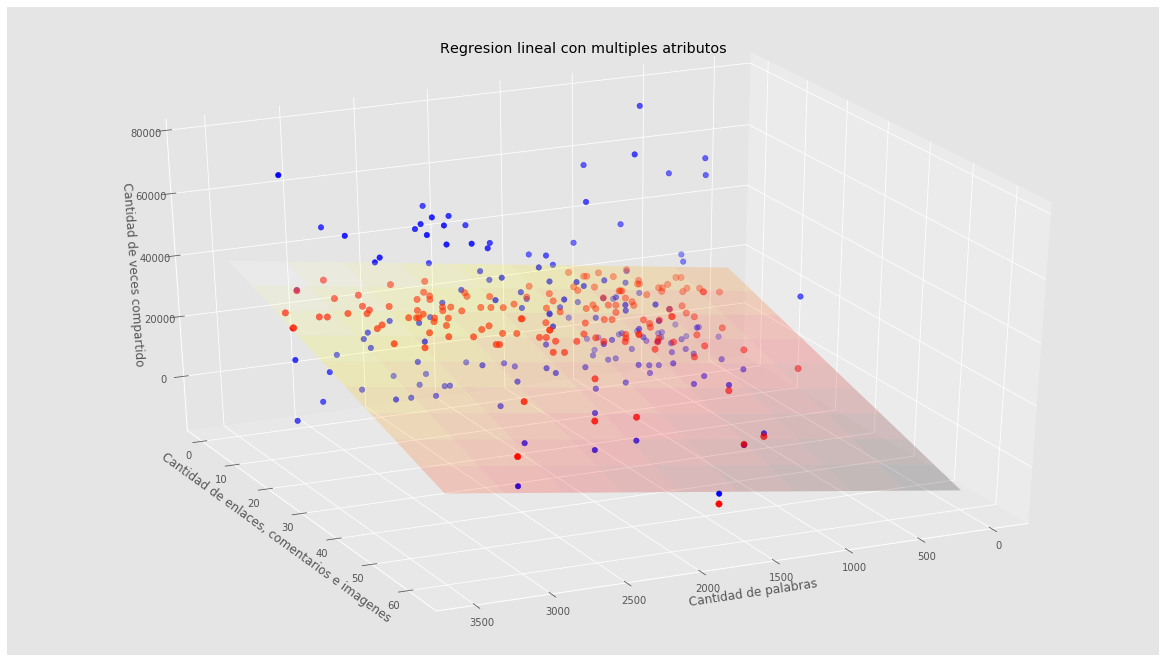

In [20]:
fig = plt.figure()
ax = Axes3D(fig)

#Se genera una malla, sobre la cual se grafica el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))

#Se calcula los valores del plano para los puntos x e y 
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy)

#al igual que los correspondientes valores para z. Se debe sumar el punto de intercepcion
z = (nuevoX + nuevoY + regr2.intercept_)

#se grafica el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

#en azul los puntos en 3D
ax.scatter(XY_train[:,0], XY_train[:,1], z_train, c='blue',s=30)

ax.scatter(XY_train[:,0], XY_train[:,1], z_pred, c='red', s=40)

#Con esto se situa la camara con la que se visualiza
ax.view_init(elev=30., azim=65)

ax.set_xlabel('Cantidad de palabras')
ax.set_ylabel('Cantidad de enlaces, comentarios e imagenes')
ax.set_zlabel('Cantidad de veces compartido')
ax.set_title('Regresion lineal con multiples atributos')